<a href="https://colab.research.google.com/github/jameskch-collab/ADALL_github/blob/main/Laptop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
# Example: Replace this with the raw URL of your GitHub file
github_raw_url = 'https://raw.githubusercontent.com/jameskch-collab/ADALL_github/main/laptop_prices_2024_sgd_TL.csv'
try:
  df = pd.read_csv(github_raw_url)
  print("Successfully loaded data from GitHub!")
  display(df.head())
except Exception as e:
  print(f"Error loading data: {e}")
  print("Please ensure the URL is correct and the file format is compatible with `pd.read_csv`.")


Successfully loaded data from GitHub!


,Brand,Model,CPU,GPU,RAM_GB,Storage_Type,Storage_GB,Touchscreen,Weight_kg,Screen_Size_inch,Discount_percent,Price_SGD,Brand_Discount,Member_Discount
0,Acer,Aspire 5,Intel i9-14900HK,NVIDIA RTX 4070,64,SSD,256,False,1.56,16.0,3.27,2413.36,5,144.80
1,Acer,Nitro 5,AMD Ryzen 9 8900HX,AMD Radeon 780M,32,SSD,1024,True,1.45,14.0,5.03,1773.75,5,124.16
2,Acer,Nitro 5,AMD Ryzen 5 8600H,NVIDIA RTX 4050,32,SSD,2048,False,1.34,14.0,4.41,1634.07,5,98.04
3,Acer,TravelMate P6,Intel Core Ultra 7 15500H,NVIDIA RTX 4060,16,SSD,4096,True,1.18,13.3,2.16,2362.59,5,118.13
4,Acer,Predator Helios 300,Intel i7-14800H,NVIDIA RTX 4070,8,SSD,1024,True,1.31,14.0,6.93,2218.55,5,155.30


In [12]:
# Check number of rows and columns, data types, obvious ID columns, and whether
# types match their real-world meaning. Identify missing values and invalid
# entries.





,Brand,Model,CPU,GPU,RAM_GB,Storage_Type,Storage_GB,Touchscreen,Weight_kg,Screen_Size_inch,Discount_percent,Price_SGD,Brand_Discount,Member_Discount
0,Acer,Aspire 5,Intel i9-14900HK,NVIDIA RTX 4070,64,SSD,256,False,1.56,16.0,3.27,2413.36,5,144.80
1,Acer,Nitro 5,AMD Ryzen 9 8900HX,AMD Radeon 780M,32,SSD,1024,True,1.45,14.0,5.03,1773.75,5,124.16
2,Acer,Nitro 5,AMD Ryzen 5 8600H,NVIDIA RTX 4050,32,SSD,2048,False,1.34,14.0,4.41,1634.07,5,98.04
3,Acer,TravelMate P6,Intel Core Ultra 7 15500H,NVIDIA RTX 4060,16,SSD,4096,True,1.18,13.3,2.16,2362.59,5,118.13
4,Acer,Predator Helios 300,Intel i7-14800H,NVIDIA RTX 4070,8,SSD,1024,True,1.31,14.0,6.93,2218.55,5,155.30


In [13]:
import numpy as np

# Identify missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Display data types to check for inconsistencies
print("\nData types:")
print(df.dtypes)

# Check for unique values in categorical columns to identify invalid entries
print("\nUnique values for categorical columns (first 20 unique values if more than 20):")
for col in df.select_dtypes(include='object').columns:
    unique_vals = df[col].unique()
    if len(unique_vals) > 20:
        print(f"  {col}: {unique_vals[:20]}...")
    else:
        print(f"  {col}: {unique_vals}")

# Check for suspicious values in numerical columns (e.g., negative prices, percentages > 100)
print("\nDescriptive statistics for numerical columns:")
print(df.describe())


Missing values per column:
Brand               0
Model               0
CPU                 0
GPU                 0
RAM_GB              0
Storage_Type        0
Storage_GB          0
Touchscreen         0
Weight_kg           0
Screen_Size_inch    0
Discount_percent    0
Price_SGD           0
Brand_Discount      0
Member_Discount     0
dtype: int64

Data types:
Brand                object
Model                object
CPU                  object
GPU                  object
RAM_GB                int64
Storage_Type         object
Storage_GB            int64
Touchscreen            bool
Weight_kg           float64
Screen_Size_inch    float64
Discount_percent    float64
Price_SGD           float64
Brand_Discount        int64
Member_Discount     float64
dtype: object

Unique values for categorical columns (first 20 unique values if more than 20):
  Brand: ['Acer' 'Asus' 'Dell' 'HP' 'Lenovo' 'Microsoft']
  Model: ['Aspire 5' 'Nitro 5' 'TravelMate P6' 'Predator Helios 300' 'Swift 3'
 'ZenBook 14' 

### Identifying Target Variable and Redundant Features

Based on the data's nature and previous analysis:

*   **`Price_SGD`** is most likely the target variable, representing the price of the laptops.
*   **`Storage_Type`** has only one unique value ('SSD'), making it a redundant feature that does not contribute to distinguishing between different laptop entries. It is advisable to remove such columns as they do not add value to the model and can sometimes cause issues.

Let's verify the unique values for `Storage_Type` again and then drop it from the DataFrame.

In [14]:
print(f"Unique values in 'Storage_Type': {df['Storage_Type'].unique()}")

if 'Storage_Type' in df.columns and len(df['Storage_Type'].unique()) == 1:
    print("\n'Storage_Type' column has only one unique value and will be dropped.")
    df = df.drop(columns=['Storage_Type'])
    print("Updated DataFrame columns:")
    print(df.columns)
else:
    print("\n'Storage_Type' column is not constant or does not exist.")

display(df.head())

Unique values in 'Storage_Type': ['SSD']

'Storage_Type' column has only one unique value and will be dropped.
Updated DataFrame columns:
Index(['Brand', 'Model', 'CPU', 'GPU', 'RAM_GB', 'Storage_GB', 'Touchscreen',
       'Weight_kg', 'Screen_Size_inch', 'Discount_percent', 'Price_SGD',
       'Brand_Discount', 'Member_Discount'],
      dtype='object')


,Brand,Model,CPU,GPU,RAM_GB,Storage_GB,Touchscreen,Weight_kg,Screen_Size_inch,Discount_percent,Price_SGD,Brand_Discount,Member_Discount
0,Acer,Aspire 5,Intel i9-14900HK,NVIDIA RTX 4070,64,256,False,1.56,16.0,3.27,2413.36,5,144.80
1,Acer,Nitro 5,AMD Ryzen 9 8900HX,AMD Radeon 780M,32,1024,True,1.45,14.0,5.03,1773.75,5,124.16
2,Acer,Nitro 5,AMD Ryzen 5 8600H,NVIDIA RTX 4050,32,2048,False,1.34,14.0,4.41,1634.07,5,98.04
3,Acer,TravelMate P6,Intel Core Ultra 7 15500H,NVIDIA RTX 4060,16,4096,True,1.18,13.3,2.16,2362.59,5,118.13
4,Acer,Predator Helios 300,Intel i7-14800H,NVIDIA RTX 4070,8,1024,True,1.31,14.0,6.93,2218.55,5,155.30


### Row Definition and Target Variable Confirmation

*   **Meaning of Each Row**: Each row in the DataFrame represents a unique laptop model, detailing its specifications such as Brand, Model, CPU, GPU, RAM, Storage, Touchscreen capability, Weight, Screen Size, and various price-related attributes (Discount, Price in SGD, Brand Discount, Member Discount).

*   **Target Variable**: The confirmed target variable is `Price_SGD`.

*   **Target Variable Type**: `Price_SGD` is a **numerical (continuous)** variable, as it represents a measurable quantity (laptop price) that can take any value within a given range.

### Variable Categorization for Modeling

Based on the analysis of data types, unique values, and domain knowledge, we can categorize the variables as follows:

*   **Usable as-is (Numerical/Boolean)**:
    *   `RAM_GB`: Already numerical.
    *   `Storage_GB`: Already numerical.
    *   `Weight_kg`: Already numerical.
    *   `Screen_Size_inch`: Already numerical.
    *   `Discount_percent`: Already numerical.
    *   `Price_SGD`: This is our target variable, numerical and ready for use.
    *   `Brand_Discount`: Already numerical.
    *   `Member_Discount`: Already numerical.
    *   `Touchscreen`: Boolean, can be used directly or easily converted to 0/1.

*   **Need Transformation/Encoding (Categorical)**:
    *   `Brand`: Categorical, requires encoding.
    *   `Model`: Categorical, requires encoding.
    *   `CPU`: Categorical, requires encoding.
    *   `GPU`: Categorical, requires encoding.

*   **Excluded (Already Dropped)**:
    *   `Storage_Type`: Had only one unique value ('SSD') and was dropped in the previous step.

### Inspecting Ranges, Skewness, Outliers, and Rare Categories

To understand the distribution of our numerical and categorical features, we will perform the following steps:

1.  **Descriptive Statistics**: Re-examine `df.describe()` to pay close attention to min, max, mean, and standard deviation for numerical columns to get a sense of their ranges and potential outliers.
2.  **Skewness and Outliers (Numerical)**: Visualize numerical distributions using histograms and box plots. Histograms will show the shape of the distribution (and thus skewness), while box plots are excellent for identifying outliers.
3.  **Rare Categories (Categorical)**: Analyze value counts for categorical columns to identify categories with very few instances, which might be treated differently in modeling.


Descriptive statistics for numerical columns (focus on ranges):


,count,mean,std,min,25%,50%,75%,max
RAM_GB,1000.0,53.12800,44.413288,8.00,16.0000,32.000,64.0000,128.00
Storage_GB,1000.0,1505.02400,1380.203919,256.00,512.0000,1024.000,2048.0000,4096.00
Weight_kg,1000.0,2.03656,0.746477,1.00,1.3400,1.970,2.6800,3.50
Screen_Size_inch,1000.0,15.64570,1.759846,13.30,14.0000,15.600,17.3000,18.40
Discount_percent,1000.0,7.53823,4.334012,0.00,3.8150,7.480,11.2250,15.00
Price_SGD,1000.0,2277.79641,616.496246,995.77,1776.2125,2257.765,2711.6800,4156.50
Brand_Discount,1000.0,6.76800,2.634600,3.00,5.0000,7.000,10.0000,10.00
Member_Discount,1000.0,135.81066,41.344593,50.74,103.4350,131.095,163.0525,281.34



Skewness for numerical columns:
RAM_GB              0.746462
Storage_GB          0.992171
Weight_kg           0.272414
Screen_Size_inch    0.111150
Discount_percent   -0.006877
Price_SGD           0.281510
Brand_Discount      0.071668
Member_Discount     0.503652
dtype: float64


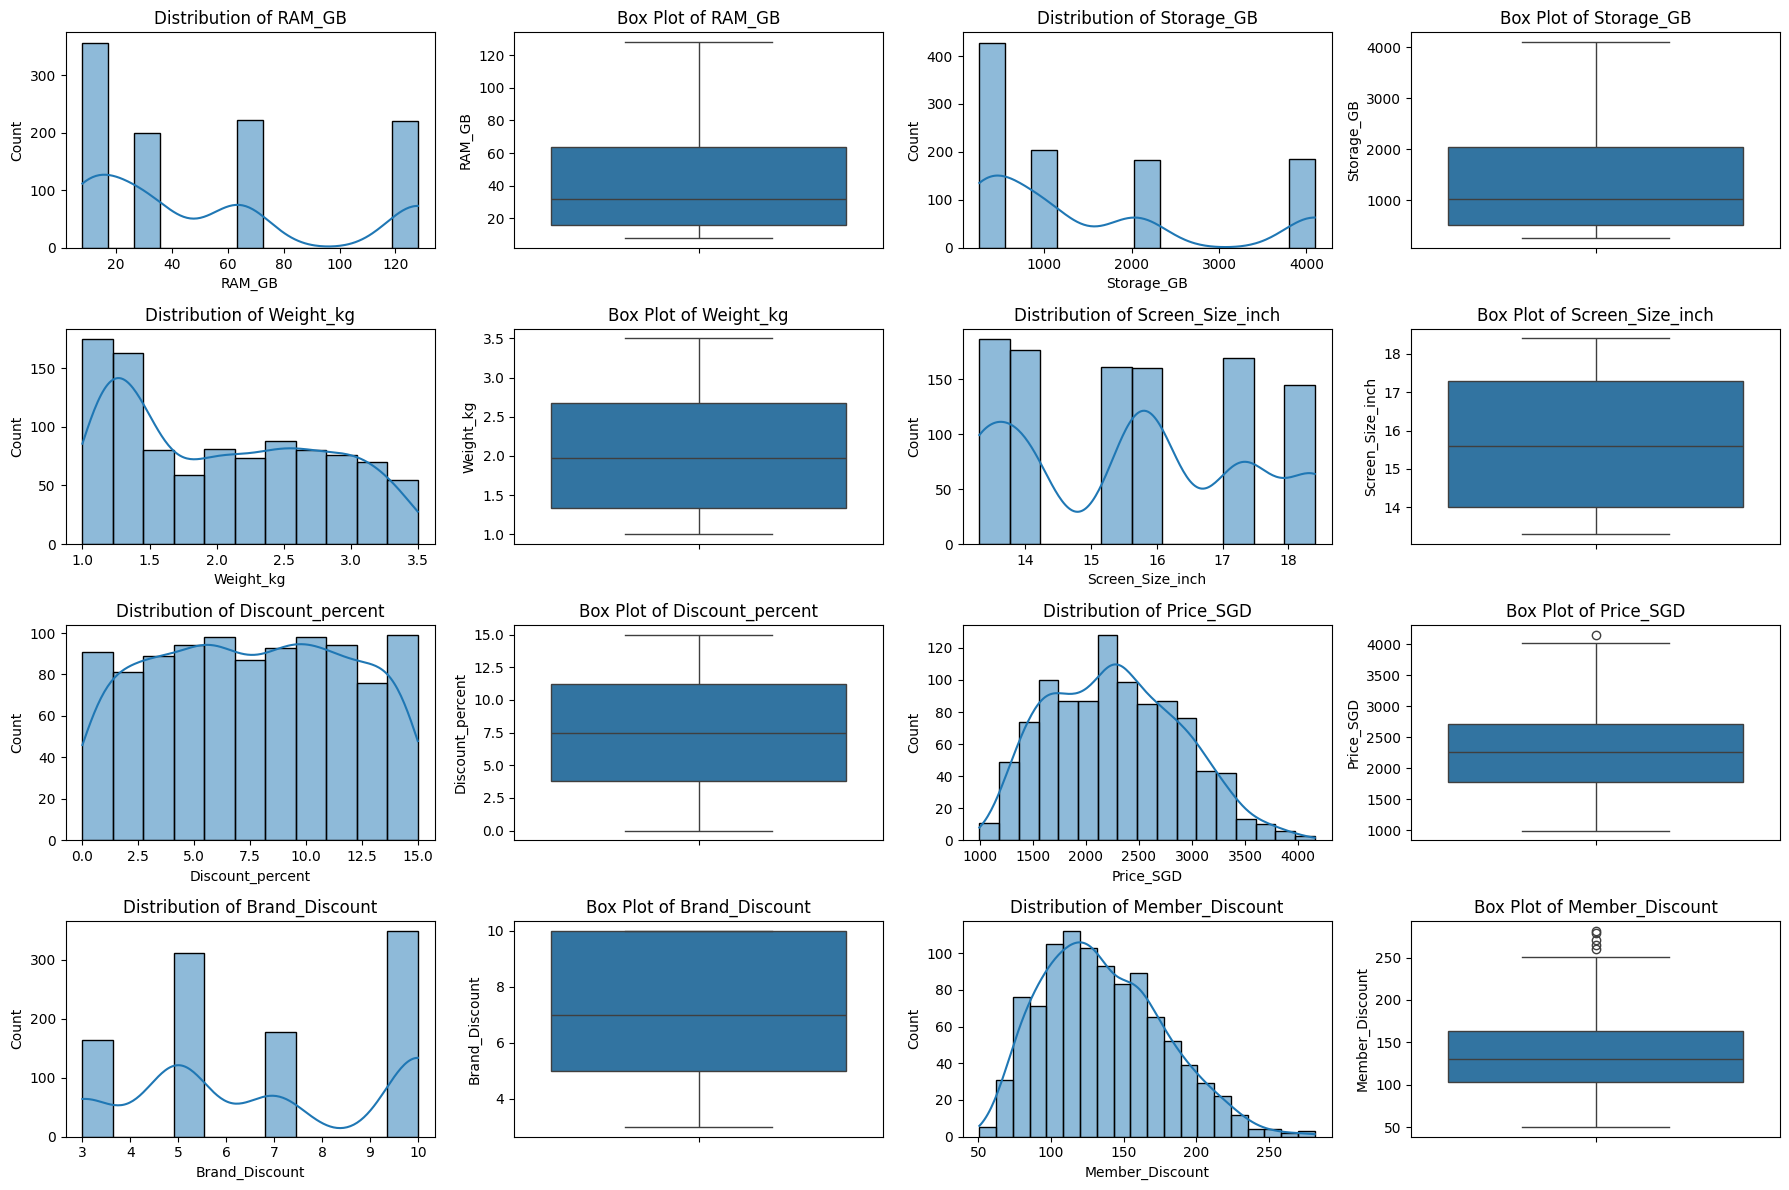


Value Counts for Categorical Columns (checking for rare categories):

--- Brand ---


,count
Brand,
Asus,177
Acer,176
Microsoft,174
Lenovo,174
Dell,163
HP,136


  No particularly rare categories (less than 1% of data) found in Brand.

--- Model ---


,count
Model,
Predator Helios 300,48
ExpertBook B9,43
Surface Book 3,43
Legion 5,40
Alienware M15,38
Aspire 5,38
Surface Go 3,38
ThinkBook 14s,37
XPS 15,37


  No particularly rare categories (less than 1% of data) found in Model.

--- CPU ---


,count
CPU,
Intel i5-14600H,114
Intel i7-14800H,106
Intel i9-14900HK,103
Intel i5-14500H,102
Intel i7-14700H,101
AMD Ryzen 5 8600H,101
Intel Core Ultra 7 15500H,99
Intel Core Ultra 9 15700H,96
AMD Ryzen 9 8900HX,93


  No particularly rare categories (less than 1% of data) found in CPU.

--- GPU ---


,count
GPU,
NVIDIA RTX 4070,268
NVIDIA RTX 4080,146
NVIDIA RTX 4060,137
NVIDIA RTX 4050,114
NVIDIA RTX 3050,97
Intel Arc A750M,76
Intel Iris Xe,71
AMD Radeon 780M,56
AMD Radeon 680M,35


  No particularly rare categories (less than 1% of data) found in GPU.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Re-examine Descriptive Statistics ---
print("\nDescriptive statistics for numerical columns (focus on ranges):")
display(df.describe().T)

# --- 2. Check Skewness for numerical columns ---
print("\nSkewness for numerical columns:")
print(df.select_dtypes(include=['number']).skew())

# --- 3. Visualize Numerical Distributions (Histograms and Box Plots) for Skewness and Outliers ---
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, 2*i + 1) # Histogram
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(4, 4, 2*i + 2) # Box Plot
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# --- 4. Identify Rare Categories for Categorical Columns ---
print("\nValue Counts for Categorical Columns (checking for rare categories):")
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    print(f"\n--- {col} ---")
    value_counts = df[col].value_counts()
    display(value_counts)
    # Optionally, print categories with less than a certain threshold (e.g., 5% of total)
    total_rows = len(df)
    rare_categories = value_counts[value_counts < (total_rows * 0.01)] # Example: less than 1% of data
    if not rare_categories.empty:
        print(f"  Rare categories (less than 1% of data) in {col}:\n{rare_categories}")
    else:
        print(f"  No particularly rare categories (less than 1% of data) found in {col}.")